In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_titanicpath = (r"C:\Users\BAJRANG\Downloads\titanic.csv")

# Read the file into a variable fifa_data
df_titanic = pd.read_csv(df_titanicpath)


In [3]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_titanic['Age']=df_titanic.Age.fillna(df_titanic.Age.mean())

In [5]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Box Plot


<AxesSubplot:>

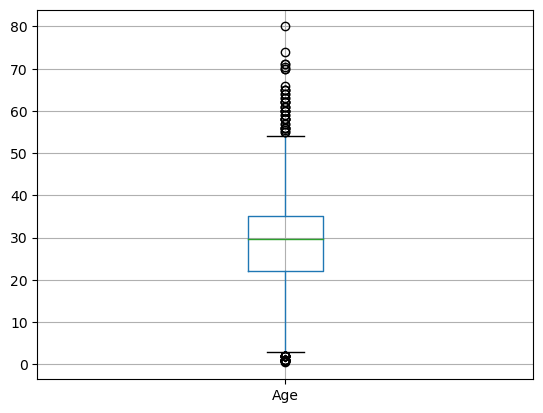

In [7]:
df_titanic.boxplot("Age")

In [12]:
df_titanic.boxplot("Fare")

<AxesSubplot:xlabel='Age'>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


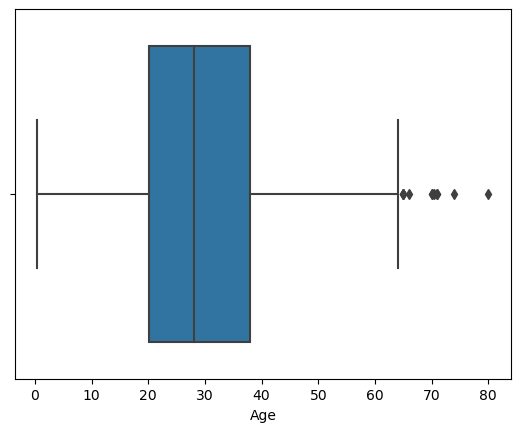

In [20]:
sns.boxplot(df_titanic["Age"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


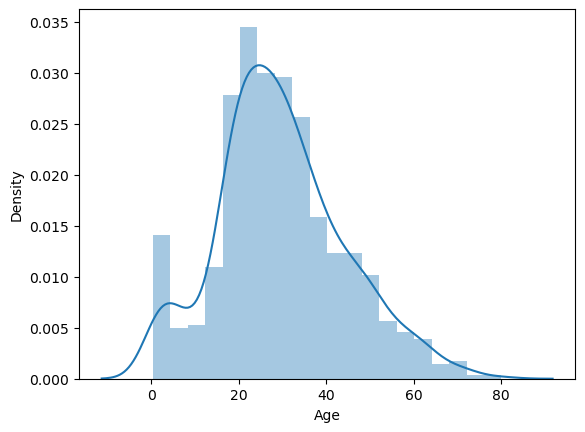

In [21]:
import seaborn as sns
sns.distplot(df_titanic["Age"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


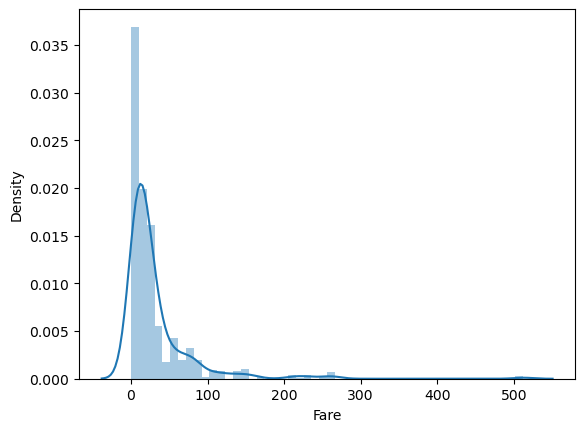

In [22]:
sns.distplot(df_titanic["Fare"])
plt.show()

In [23]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# only for numaric data
df_titanic.quantile([.25,.5,.75], axis = 0)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0.25,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
0.50,446.0,0.0,3.0,28.000,0.0,0.0,14.4542
0.75,668.5,1.0,3.0,38.000,1.0,0.0,31.0000


upper limit 73.27860964406095
lower limit -13.88037434994331
mean value: 29.69911764705882
1st std 14.526497332334044


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


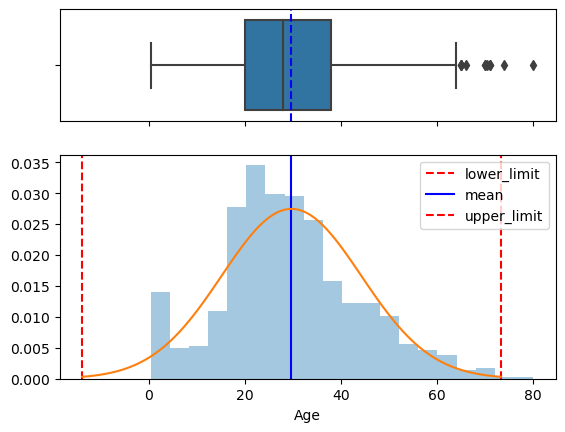

In [28]:
from scipy.stats import norm
%matplotlib inline
f,(ax_box, ax_hist)=plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.5,1)})

mean=df_titanic.Age.mean()
std= df_titanic.Age.std()
median=df_titanic.Age.median()
upper_limit=mean+std*3
lower_limit=mean-std*3
print("upper limit",upper_limit)
print("lower limit",lower_limit)

sns.boxplot(df_titanic["Age"],ax=ax_box)
ax_box.axvline(mean,color='b',linestyle='--')

sns.distplot(df_titanic["Age"],ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit,color='r',linestyle='--')
ax_hist.axvline(mean,color='b',linestyle='-')
ax_hist.axvline(upper_limit,color='r',linestyle='--')

plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x=np.linspace(mean-3*std, mean+3*std,100)
plt.plot(x,norm.pdf(x,mean,std))
plt.legend({"lower_limit":lower_limit,"mean":mean,"upper_limit":upper_limit})
print("mean value:",mean)
print("1st std",std)
plt.show()

In [36]:
age_outlier=df_titanic[(df_titanic.Age<lower_limit)| (df_titanic.Age>upper_limit)]
age_outlier
print(age_outlier.shape)

(2, 12)
